# Pymaceuticals Inc.
---

### Analysis

In this study, Pymaceuticals Inc., is working on creating and developing anti-cancer medications testing subjects to compare the effect on the medications that are developed in the company. This study is testing a potential treatment for squamous cell carcinoma (SCC) which is a form of skin cancer that is common, and the test subjects for this study are mice. 

Over 249 mice with this skin condition (SCC) were given treatments with a range of drug regiments to identify what it would be the most appropiate or succesful treatment for SCC. In the course of 45 days the development of tumors of these mice was studied. The drug of interest that was being studied for these treatment was Capomulin which has a great potential for this type of disease. The analysis is as follows. 

Capomulin reduced the average squamous cell carcinoma tumor volume in the subjects on the 45-day period. It will be recommended and interesting to continue this study over the 45-day period to see if the tumors can be completedly erradicated. It was determined in the scatter plots (see below scatter plots and line regresions for reference) that the heavier the mouse is the effectiveness of the drug will be less, so that means that weight is also an influential factor on how the drug will react in a persons body. 

Out of the four drug regiments (Capomulin, Ramicane, Infubinol and Ceftamin) Capomulin and Ramicane appeared to be equally effective, one way to test and compare which one is more effective will be to test subjects that have equivalent tumor volumes. 
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(np.unique(combined_df["Mouse ID"]))

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
optional = combined_df.loc[combined_df["Mouse ID"] =="g989", :]
optional

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cdf = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse)==False]
cdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
# Checking the number of mice in the clean DataFrame.
len(np.unique(cdf["Mouse ID"]))

248

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cdf["Tumor Volume (mm3)"].groupby(cdf["Drug Regimen"]).mean()
median = cdf["Tumor Volume (mm3)"].groupby(cdf["Drug Regimen"]).median()
variance = cdf["Tumor Volume (mm3)"].groupby(cdf["Drug Regimen"]).var()
stand_dev =cdf["Tumor Volume (mm3)"].groupby(cdf["Drug Regimen"]).std()
sem = cdf["Tumor Volume (mm3)"].groupby(cdf["Drug Regimen"]).sem()

st_sum = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance,
                      "Tumor Volume Std. Dev.": stand_dev, "Tumor Volume Std. Err": sem})
# Assemble the resulting series into a single summary DataFrame.
st_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table
summary_agg = summary_table.rename(columns={'mean': 'mean', 'median': 'median', 'variance': 'variance',
                                            'standard dev':'stand_dev', 'sem': 'sem'})
summary_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Timepoints for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoints'>

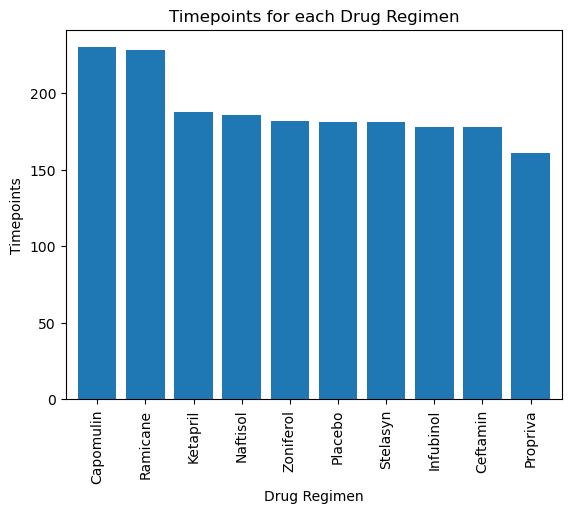

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = combined_df['Drug Regimen'].value_counts().plot.bar(width=0.8)

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Timepoints")
bar_plot.set_title("Timepoints for each Drug Regimen")

bar_plot


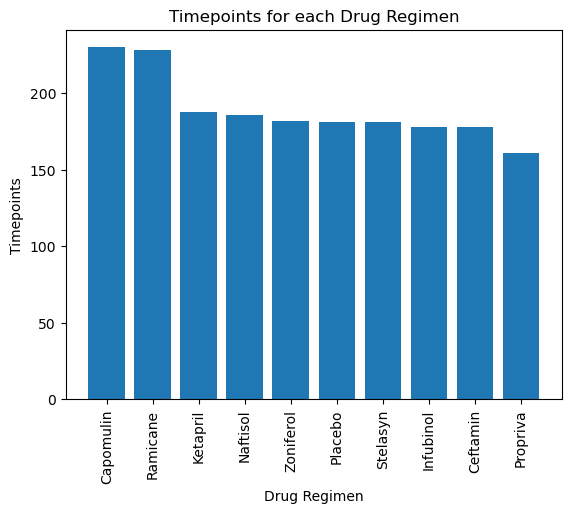

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# calculate number of rows 
counts = combined_df['Drug Regimen'].value_counts()

# Set the axis 
x_axis = np.arange(len(counts))

# Develop the plot bar
plt.bar(x_axis, counts, width=0.8)

tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, counts.index.values)
plt.xticks(rotation=90)

# labels 
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Timepoints for each Drug Regimen")
plt.show()

Text(0, 0.5, '')

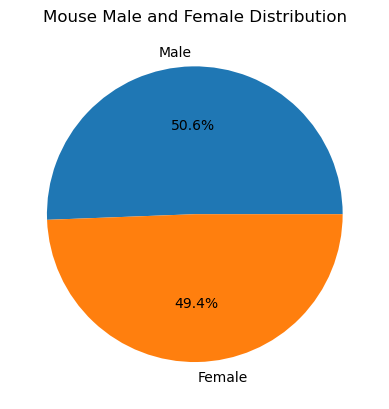

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = combined_df['Sex'].value_counts()
pie_plot = pie_df.plot.pie(autopct="%1.1f%%", startangle=0, title='Mouse Male and Female Distribution')
pie_plot.set_ylabel('')

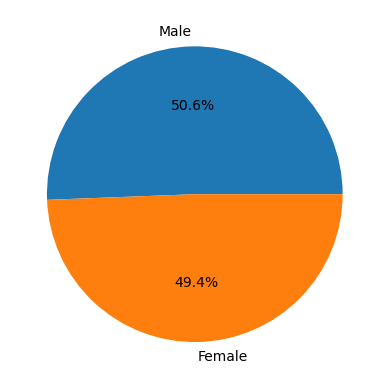

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df = combined_df['Sex'].value_counts()
plt.pie(pie_df, labels=pie_df.index.values, autopct="%1.1f%%", startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_vol = cdf.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df= tumor_vol.reset_index()





In [87]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound)
                                 | (tumor_vol_data > upper_bound)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_vol_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data_list.append(tumor_vol_data)

    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = tumor_vol_data.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound)
                                 | (tumor_vol_data > upper_bound)]
    if outliers.count() > 0:
                print(outliers)
        
            




Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 0
55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceftamin is: 57.75
Number of o

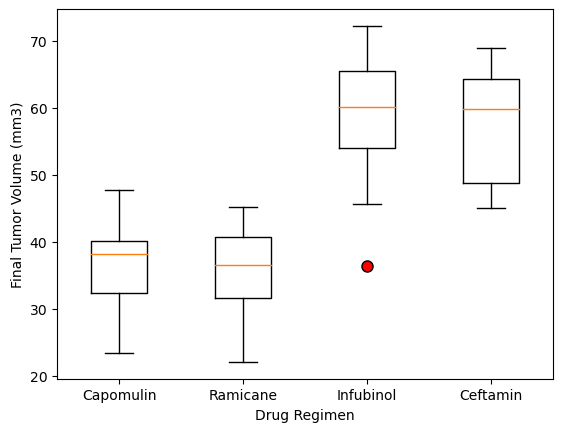

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(tumor_vol_data_list, flierprops=flierprops)

plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

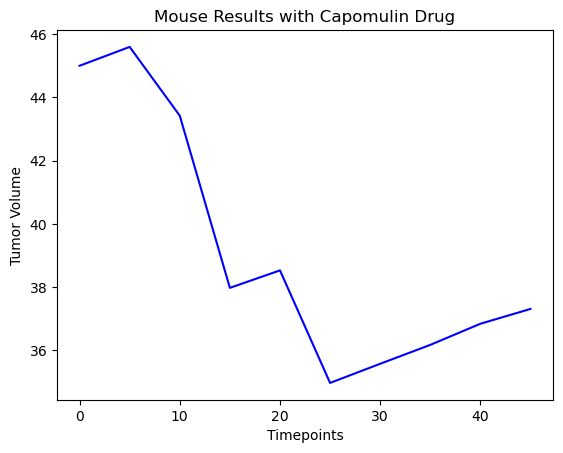

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = cdf.loc[cdf['Drug Regimen'] == 'Capomulin']

mouse_id = 'i738'
mouse_df = capomulin_mouse.loc[capomulin_mouse['Mouse ID'] == mouse_id]

# line plot 

time = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='', color='blue')
plt.title('Mouse Results with Capomulin Drug')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume')
plt.show()

C:\Users\sierr\AppData\Local\Temp\ipykernel_46848\2342710665.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter= capomulin_mouse.groupby('Mouse ID').mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

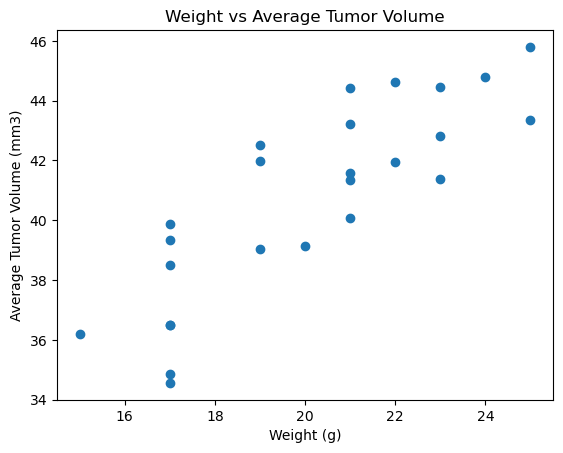

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# # Merge average tumor volume onto data_df and drop duplicates
scatter= capomulin_mouse.groupby('Mouse ID').mean()
mouse_weight= scatter['Weight (g)']
tumor_vol_mean= scatter['Tumor Volume (mm3)']

plt.scatter(mouse_weight, tumor_vol_mean)
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

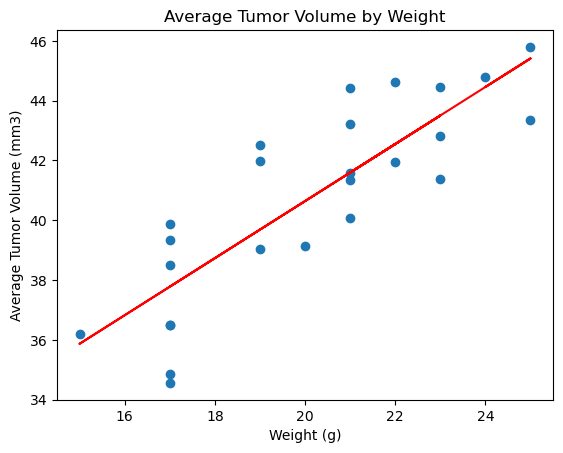

In [93]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = cdf.loc[cdf['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

# Calculating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Labels and title 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()